In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf

mpl.style.use("seaborn")

/home/jo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Fetch Data

In [2]:
#dim ethin
dim = 38

n_electrons = 14

In [3]:
from SCFInitialGuess.utilities.dataset import make_butadien_dataset, extract_triu

def load_triu(S, P, dim):
    
    return [extract_triu(s, dim) for s in S], [extract_triu(p, dim) for p in P]

dataset, molecules = make_butadien_dataset(
    np.load("molecules_ethin_6-31g**.npy"),
    *load_triu(*np.load("dataset_ethin_6-31g**.npy"), dim), 
)

[-] 2018-05-01 13:22:32: Data set normalized. Mean value std: 0.02714081816336006


# MF Initializer 

In [4]:
from SCFInitialGuess.utilities.analysis import mf_initializer, mf_initializer_damping, mf_initializer_diis
mf_initializer = mf_initializer  

# Ethin
dim = 38

dim^2 = 2304

dim_ut = 1176

In [5]:
dim_triu = int(dim * (dim + 1) / 2)

In [6]:
from SCFInitialGuess.nn.networks import EluFixedValue

graph = tf.Graph()

structure, weights, biases = np.load("network_ethin.npy", encoding="latin1")

with graph.as_default():
    sess = tf.Session()
    network = EluFixedValue(structure, weights, biases)
    network.setup()
    sess.run(tf.global_variables_initializer())

In [7]:
p = network.run(sess, dataset.testing[0])

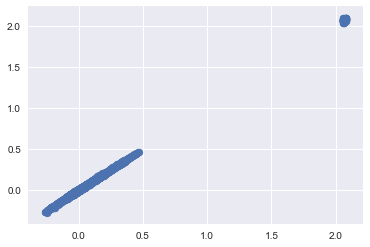

In [8]:
plt.scatter(
    dataset.testing[1],
    p
)
plt.show()

In [9]:
from SCFInitialGuess.utilities.analysis import mf_initializer, measure_all_quantities, make_results_str

results = measure_all_quantities(
    p,
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:22:32: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:34: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:34: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:34: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:34: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:35: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:35: Iteration calculation: 6
[ ] 2018-05-01 13:22:36: Iteration calculation: 7
[ ] 2018-05-01 13:22:36: Iteration calculation: 8


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:36: Iteration calculation: 9
[ ] 2018-05-01 13:22:37: Iteration calculation: 10


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:37: Iteration calculation: 11
[ ] 2018-05-01 13:22:37: Iteration calculation: 12


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:37: Iteration calculation: 13
[ ] 2018-05-01 13:22:37: Iteration calculation: 14


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:38: Iteration calculation: 15
[ ] 2018-05-01 13:22:38: Iteration calculation: 16


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:39: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:40: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:40: Iteration calculation: 19
[ ] 2018-05-01 13:22:40: Iteration calculation: 20


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:41: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:41: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:42: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:43: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:44: Iteration calculation: 25
[ ] 2018-05-01 13:22:44: Iteration calculation: 26


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:44: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:44: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:45: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:45: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:46: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:47: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:47: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:48: Iteration calculation: 34
[ ] 2018-05-01 13:22:48: Iteration calculation: 35


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:49: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:50: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:51: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:51: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:52: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:52: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:53: Iteration calculation: 42
[ ] 2018-05-01 13:22:53: Iteration calculation: 43


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:53: Iteration calculation: 44
[ ] 2018-05-01 13:22:53: Iteration calculation: 45


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:54: Iteration calculation: 46
[ ] 2018-05-01 13:22:54: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:54: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:54: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [10]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.89025E-03 +- 3.49183E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.72961E-03 +- 4.11571E-04
--- Occupance Error ---
5.08916E-02 +- 4.14278E-02
--- Avg. Iterations ---
5.99400E+01 +- 3.90274E+01



## McWheeny that shit

In [11]:
def mc_wheeny_purification(p,s):
    return (3 * np.dot(np.dot(p, s), p) - np.dot(np.dot(np.dot(np.dot(p, s), p), s), p)) / 2

def multi_mc_wheeny(p, s, n_max=4):
    for i in range(n_max):
        p = mc_wheeny_purification(p, s)
    return p

In [12]:
from SCFInitialGuess.utilities.dataset import make_matrix_batch
s_raw = make_matrix_batch(dataset.inverse_input_transform(dataset.testing[0]), dim, True)
p_batch = make_matrix_batch(p, dim, True)

In [13]:
p_mcw1 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=1), zip(p_batch, s_raw))))
p_mcw5 = np.array(list(map(lambda x: multi_mc_wheeny(x[0], x[1], n_max=5), zip(p_batch, s_raw))))

In [14]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw1)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:22:56: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:56: Iteration calculation: 1
[ ] 2018-05-01 13:22:56: Iteration calculation: 2


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:57: Iteration calculation: 3
[ ] 2018-05-01 13:22:57: Iteration calculation: 4


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:57: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:58: Iteration calculation: 6
[ ] 2018-05-01 13:22:58: Iteration calculation: 7


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:58: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:59: Iteration calculation: 9
[ ] 2018-05-01 13:22:59: Iteration calculation: 10


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:22:59: Iteration calculation: 11
[ ] 2018-05-01 13:22:59: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:00: Iteration calculation: 13
[ ] 2018-05-01 13:23:00: Iteration calculation: 14


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:00: Iteration calculation: 15
[ ] 2018-05-01 13:23:00: Iteration calculation: 16


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:01: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:02: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:02: Iteration calculation: 19
[ ] 2018-05-01 13:23:02: Iteration calculation: 20


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:03: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:03: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:04: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:05: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:05: Iteration calculation: 25
[ ] 2018-05-01 13:23:05: Iteration calculation: 26


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:05: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:06: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:07: Iteration calculation: 29
[ ] 2018-05-01 13:23:07: Iteration calculation: 30


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:07: Iteration calculation: 31
[ ] 2018-05-01 13:23:08: Iteration calculation: 32


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:08: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:09: Iteration calculation: 34
[ ] 2018-05-01 13:23:09: Iteration calculation: 35


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:09: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:10: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:10: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:10: Iteration calculation: 39
[ ] 2018-05-01 13:23:11: Iteration calculation: 40


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:11: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:11: Iteration calculation: 42
[ ] 2018-05-01 13:23:11: Iteration calculation: 43


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:12: Iteration calculation: 44
[ ] 2018-05-01 13:23:12: Iteration calculation: 45


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:12: Iteration calculation: 46
[ ] 2018-05-01 13:23:12: Iteration calculation: 47


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:12: Iteration calculation: 48
[ ] 2018-05-01 13:23:12: Iteration calculation: 49


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


In [15]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.23142E-03 +- 3.02588E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
6.23542E-05 +- 2.44549E-05
--- Occupance Error ---
3.91139E-03 +- 2.75666E-03
--- Avg. Iterations ---
5.71000E+01 +- 4.05927E+01



In [16]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_mcw5)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:23:13: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:13: Iteration calculation: 1
[ ] 2018-05-01 13:23:13: Iteration calculation: 2


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:14: Iteration calculation: 3
[ ] 2018-05-01 13:23:14: Iteration calculation: 4


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:14: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:15: Iteration calculation: 6
[ ] 2018-05-01 13:23:15: Iteration calculation: 7


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:15: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:15: Iteration calculation: 9
[ ] 2018-05-01 13:23:15: Iteration calculation: 10


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:16: Iteration calculation: 11
[ ] 2018-05-01 13:23:16: Iteration calculation: 12


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:16: Iteration calculation: 13
[ ] 2018-05-01 13:23:16: Iteration calculation: 14


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:16: Iteration calculation: 15
[ ] 2018-05-01 13:23:17: Iteration calculation: 16


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:17: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:17: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:20: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:20: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:22: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:24: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:26: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:27: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:30: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:30: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:30: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:32: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:33: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:33: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:34: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:34: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:35: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:36: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:36: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:37: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:38: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:40: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:41: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:41: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:41: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:43: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:43: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:44: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:45: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:45: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:46: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:46: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:23:46: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [17]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
1.23016E-03 +- 3.02788E-04
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.69813E-17 +- 3.08237E-18
--- Occupance Error ---
1.70530E-15 +- 1.22864E-15
--- Avg. Iterations ---
5.70800E+01 +- 4.05758E+01



## Classical Ethan

In [18]:
from pyscf.scf import hf

p_sap = [hf.init_guess_by_atom(mol.get_pyscf_molecule()) for mol in molecules[1]]
p_minao = [hf.init_guess_by_minao(mol.get_pyscf_molecule()) for mol in molecules[1]]
p_gwh = [hf.init_guess_by_wolfsberg_helmholtz(mol.get_pyscf_molecule()) for mol in molecules[1]]

Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs s

In [19]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_sap)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:24:09: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:10: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:11: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:11: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:11: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:13: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:16: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:16: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:17: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:18: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:19: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:19: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:19: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:20: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:20: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:22: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:22: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:24: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:25: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:26: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:27: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:28: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:30: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:32: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:33: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:35: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:35: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:35: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:37: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:39: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:40: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:42: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:43: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:45: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:47: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:48: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:49: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:52: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:56: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:58: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:59: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:24:59: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:03: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:03: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:06: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:07: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:08: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:09: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:10: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:11: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [20]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
2.27492E-02 +- 1.18938E-03
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.16696E-02 +- 1.68920E-03
--- Occupance Error ---
2.55795E-15 +- 2.46549E-15
--- Avg. Iterations ---
6.01200E+01 +- 3.93886E+01



In [21]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_minao)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:25:13: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:16: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:16: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:17: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:17: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:20: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:22: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:23: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:24: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:26: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:27: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:27: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:28: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:29: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:29: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:32: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:33: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:35: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:38: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:40: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:40: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:43: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:46: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:48: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:50: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:53: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:53: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:54: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:57: Iteration calculation: 28


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:25:59: Iteration calculation: 29


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:00: Iteration calculation: 30


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:03: Iteration calculation: 31


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:05: Iteration calculation: 32


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:08: Iteration calculation: 33


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:10: Iteration calculation: 34


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:11: Iteration calculation: 35


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:12: Iteration calculation: 36


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:16: Iteration calculation: 37


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:18: Iteration calculation: 38


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:20: Iteration calculation: 39


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:20: Iteration calculation: 40


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:21: Iteration calculation: 41


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:24: Iteration calculation: 42


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:25: Iteration calculation: 43


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:28: Iteration calculation: 44


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:28: Iteration calculation: 45


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:30: Iteration calculation: 46


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:30: Iteration calculation: 47


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:31: Iteration calculation: 48


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:32: Iteration calculation: 49


Warn: Ipython shell catchs sys.args


In [ ]:
print(make_results_str(list(map(lambda x: [x], results))))

--- Absolute Error ---
2.11248E-02 +- 1.39056E-03
--- Symmetry Error ---
0.00000E+00 +- 0.00000E+00
--- Idempotence Error ---
2.15960E-02 +- 2.05815E-03
--- Occupance Error ---
1.29000E-02 +- 5.53833E-05
--- Avg. Iterations ---
5.97800E+01 +- 3.94590E+01



In [ ]:
results = measure_all_quantities(
    list(map(lambda x: extract_triu(x, dim), p_gwh)),
    dataset,
    molecules[1],
    n_electrons,
    mf_initializer,
    dim,
    True
)

[ ] 2018-05-01 13:26:35: Iteration calculation: 0


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:39: Iteration calculation: 1


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:39: Iteration calculation: 2


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:40: Iteration calculation: 3


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:41: Iteration calculation: 4


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:44: Iteration calculation: 5


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:46: Iteration calculation: 6


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:47: Iteration calculation: 7


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:48: Iteration calculation: 8


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:50: Iteration calculation: 9


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:50: Iteration calculation: 10


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:51: Iteration calculation: 11


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:52: Iteration calculation: 12


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:53: Iteration calculation: 13


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:54: Iteration calculation: 14


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:57: Iteration calculation: 15


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:26:57: Iteration calculation: 16


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:00: Iteration calculation: 17


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:03: Iteration calculation: 18


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:06: Iteration calculation: 19


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:06: Iteration calculation: 20


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:09: Iteration calculation: 21


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:11: Iteration calculation: 22


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:13: Iteration calculation: 23


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:16: Iteration calculation: 24


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:18: Iteration calculation: 25


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:19: Iteration calculation: 26


Warn: Ipython shell catchs sys.args


[ ] 2018-05-01 13:27:20: Iteration calculation: 27


Warn: Ipython shell catchs sys.args


In [ ]:
print(make_results_str(list(map(lambda x: [x], results))))